In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

In [4]:
file = 'case1.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['Заказы', 'Коробки по заказам', 'Агрегация', 'Агрегация (города)', 'Основные', 'Карманы', 'Квартили', 'Гистограмма', 'Процентили']


In [5]:
df1 = xl.parse('Заказы')
df1.head()

,Номер заказа,Вес груза,День,Количество коробок,Город отправки,Город доставки
0,22,1122.21,1,157,Таллин,Санкт-Петербург
1,37,1110.50,1,148,Рига,Санкт-Петербург
2,64,1165.27,1,153,Москва,Рига
3,95,1157.63,1,153,Таллин,Санкт-Петербург
4,105,1000.52,1,145,Вильнюс,Санкт-Петербург


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Номер заказа        1300 non-null   int64  
 1   Вес груза           1300 non-null   float64
 2   День                1300 non-null   int64  
 3   Количество коробок  1300 non-null   int64  
 4   Город отправки      1300 non-null   object 
 5   Город доставки      1300 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 61.1+ KB


In [7]:
df1.describe()

,Номер заказа,Вес груза,День,Количество коробок
count,1300.000000,1300.000000,1300.000000,1300.000000
mean,650.500000,1132.855008,15.736154,150.870769
std,375.421985,91.835719,8.634771,10.197823
min,1.000000,823.520000,1.000000,113.000000
25%,325.750000,1067.890000,8.000000,144.000000
50%,650.500000,1136.450000,15.000000,151.000000
75%,975.250000,1195.805000,23.000000,158.000000
max,1300.000000,1375.520000,30.000000,182.000000


140 коробок укладываются в 75%, 1.2 тонны чуть больше этого квантиля

In [8]:
df1['Вес груза'].quantile([0.25,0.5,0.77])

0.25    1067.8900
0.50    1136.4500
0.77    1200.4584
Name: Вес груза, dtype: float64

Вес 77% заказов меньше 1,2 тонны

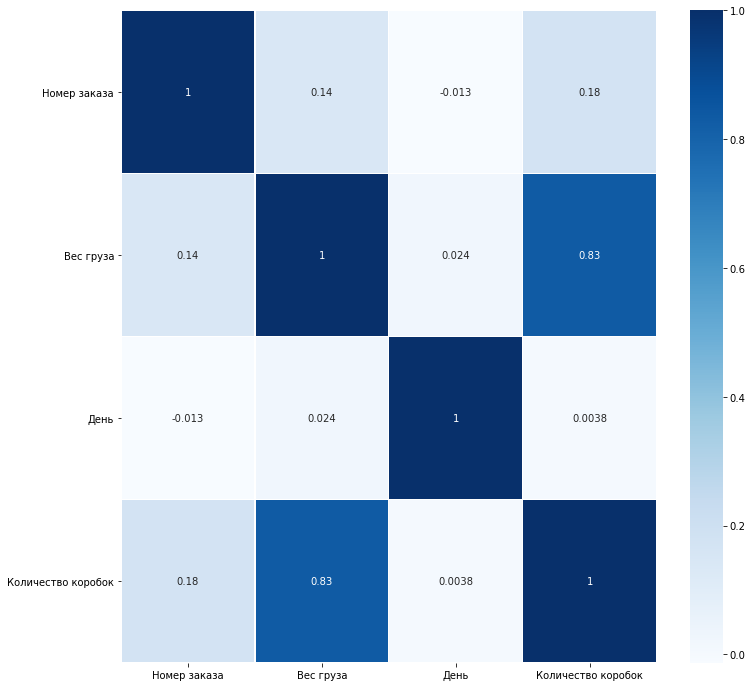

In [9]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True,cmap=plt.cm.Blues,linewidths=0.1) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Наибольшую корреляцию (0.83) имеют Вес груза и Количество коробок

In [10]:
print('Медиана =', statistics.median(df1['Вес груза']))
print('Мода =', statistics.mode(df1['Вес груза']))
print('Мат ожидание =', statistics.mean(df1['Вес груза']))
print('Стандартное отклонение =', statistics.pstdev(df1['Вес груза']))
print('Дисперсия =', statistics.pvariance(df1['Вес груза']))
print('Минимум =', min(df1['Вес груза']))
print('Максимум =', max(df1['Вес груза']))
print('Размах =', max(df1['Вес груза']) - min(df1['Вес груза']))

Медиана = 1136.4499999999998
Мода = 1157.63
Мат ожидание = 1132.8550076923077
Стандартное отклонение = 91.80039069088944
Дисперсия = 8427.311730999942
Минимум = 823.52
Максимум = 1375.52
Размах = 552.0


<AxesSubplot:title={'center':'Размах для Вес груза'}>

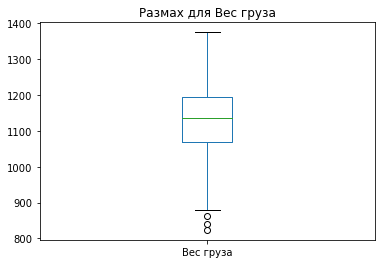

In [11]:
df1['Вес груза'].plot(kind='box' , title = 'Размах для Вес груза')

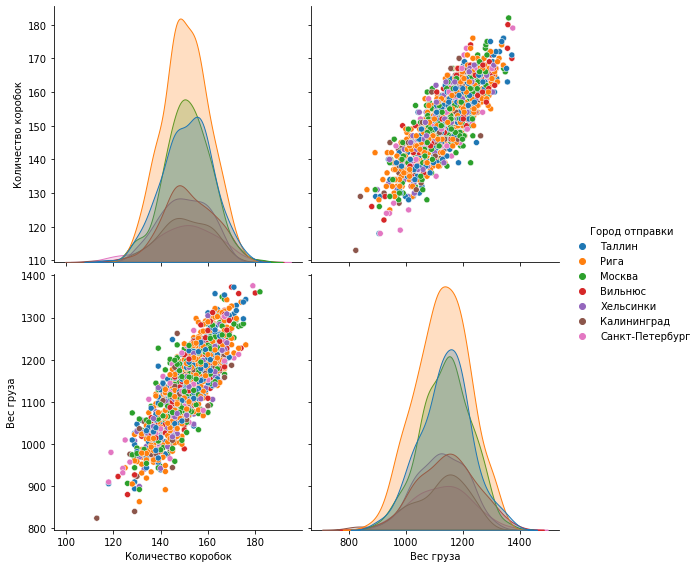

In [12]:
sns_plot = sns.pairplot(
    df1[['Количество коробок','Вес груза', 'Город отправки']],  hue= 'Город отправки', height=4)
sns_plot

Рига, Москва, Таллин имеют наибольшее количество коробок в заказе. Вес груза также у этих городов больше

(array([  3.,  18.,  70., 138., 210., 312., 284., 170.,  77.,  18.]),
 array([ 823.52,  878.72,  933.92,  989.12, 1044.32, 1099.52, 1154.72,
        1209.92, 1265.12, 1320.32, 1375.52]),
 <BarContainer object of 10 artists>)

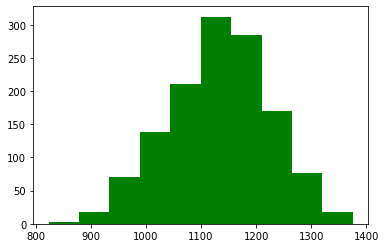

In [13]:
data = df1['Количество коробок'] 
plt.hist(df1['Вес груза'], facecolor='g')

Груз необходимо перевезти из Таллина:

In [14]:
t1 = df1[(df1['Город отправки'] == 'Таллин') & (df1['Количество коробок'] <= 140)]

In [15]:
t1.describe()

,Номер заказа,Вес груза,День,Количество коробок
count,40.000000,40.000000,40.00000,40.000000
mean,494.425000,1015.197250,15.85000,135.075000
std,292.902442,59.658817,9.50452,4.626498
min,51.000000,893.340000,1.00000,118.000000
25%,216.750000,980.307500,7.75000,133.500000
50%,445.500000,1015.080000,16.00000,137.000000
75%,753.500000,1041.107500,25.00000,139.000000
max,1068.000000,1184.600000,29.00000,140.000000


Среди перевезенных грузов из Таллина максимальный груз 140 коробок составлял 1184 кг. 140 коробок укладываются в 1,2 тонны.